<a href="https://colab.research.google.com/github/Arka1212/Live-Class-Monitoring-System-Face-Emotion-Recognition/blob/main/Live_Class_Monitoring_System_(Face_Emotion_Recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Live Class Monitoring System (Face Emotion Recognition)**

## **Project Introduction**
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms. 

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance. While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

## **Problem Statement**
The problem statement focuses on solving the above-mentioned challenge by applying deep learning algorithms to live video data. The solution to this problem is by recognizing facial emotions. This is a few shot learning live face emotion detection system. The model should be able to real-time identify the emotions of students in a live class.

## **Dataset Link**
Dataset: https://www.kaggle.com/msambare/fer2013


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### **Required Libraries**

➡️ Following are the bunch of 'Python' libraries we need to import in order to perform necessary operation with the data & model building.

In [11]:
# Importing necesssary libraries.
import numpy as np
import pandas as pd
import cv2                                    # Importing 'OpenCV'
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as mpimg
import seaborn as sns
import random     

import tensorflow as tf
from tensorflow.keras.models import Sequential                                                            
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization,Activation,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras import Model

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import zipfile
import pathlib
import os

# Removing warnings.
import warnings                                                                                
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
# Checking the 'TensorFlow' version.
print(f'Tensorflow version ----> {tf.__version__}')

Tensorflow version ----> 2.8.0


### **Data Loading & Inspection**

➡️ In this particular step, dataset will be downloaded from the source and post downloading, some inspection will be performed to view how   the data actually looks and what the dataset is actually comprised of.

In [ ]:
# Mounting the drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading data.
fn = '/content/drive/MyDrive/Capstone Projects/Deep Learning/Live Class Monitoring System (Face Emotion Recognition)/Face Emotion Dataset.zip'

# Unzipping the downloaded data as its in zip format.
zip_ref = zipfile.ZipFile(fn)
zip_ref.extractall()
zip_ref.close()

◾ The dataset is already splitted into train & test set.

In [ ]:
# Different directories in train & test set.
!ls '/content/test'
!ls '/content/train'

angry  disgust	fear  happy  neutral  sad  surprise
angry  disgust	fear  happy  neutral  sad  surprise


◾ Both the train & test set have 7 directories each which actually are the different classes of the dataset.

In [ ]:
# Getting the class names programmatically.
data_directory = pathlib.Path('/content/train')
class_names = np.array(sorted([item.name for item in data_directory.glob('*')]))    
# 'glob' returns all file paths that match a specific pattern.

print(class_names)
print(f'Total number of classes are {len(class_names)}')

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Total number of classes are 7


In total, dataset has 7 classes. They are as follows:
1. 😠 **angry**
2. 😖 **disgust**
3. 😨 **fear**
4. 😊 **happy**
5. 😐 **neutral**
6. ☹️ **sad**
7. 😯 **surprise**

In [8]:
# Creating test and train directories.
test_dir = '/content/test'
train_dir = '/content/train'

In [74]:
# Creating a helper function to visualise the images.
def view_random_images(target_directory, target_class):
  '''
  Follows through the target directory and target folder and gets a random image printed from the respective directory.
  '''
  target_folder = target_directory + '/' + target_class

  # Getting a random image from the target folder.
  random_image = random.sample(os.listdir(target_folder),1)
  print(f'Image number: {random_image}')

  # Reading and plotting the image.
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img, cmap='gray')
  plt.title(target_class.upper(), fontsize = 15)
  plt.axis('off')

  # Printing the shape of the image.
  print(f'Image shape : {img.shape}')

  return img

Image number: ['Training_80045907.jpg']
Image shape : (48, 48)


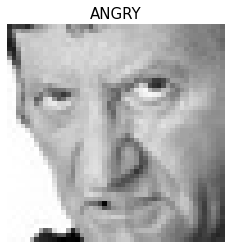

In [75]:
# Viewing random images of 'angry' class.
angry_img = view_random_images(train_dir,'angry')

Image number: ['Training_61263973.jpg']
Image shape : (48, 48)


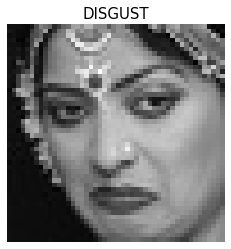

In [76]:
# Viewing random images of 'disgust' class.
disgust_img = view_random_images(train_dir,'disgust')

Image number: ['Training_64099735.jpg']
Image shape : (48, 48)


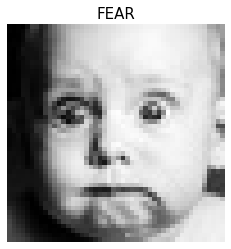

In [80]:
# Viewing random images of 'fear' class.
fear_img = view_random_images(train_dir,'fear')

Image number: ['Training_56830262.jpg']
Image shape : (48, 48)


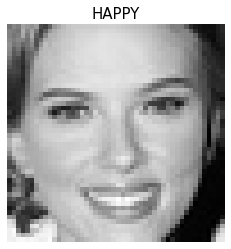

In [83]:
# Viewing random images of 'happy' class.
happy_img = view_random_images(train_dir,'happy')

Image number: ['Training_48729054.jpg']
Image shape : (48, 48)


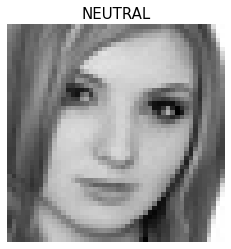

In [85]:
# Viewing random images of 'neutral' class.
neutral_img = view_random_images(train_dir,'neutral')

Image number: ['Training_14405139.jpg']
Image shape : (48, 48)


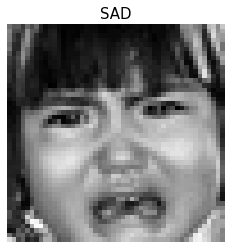

In [94]:
# Viewing random images of 'sad' class.
sad_img = view_random_images(train_dir,'sad')

Image number: ['Training_93744466.jpg']
Image shape : (48, 48)


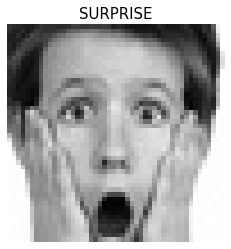

In [95]:
# Viewing random images of 'surprise' class.
surprise_img = view_random_images(train_dir,'surprise')